In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
img = plt.imread('teste.jpeg')
np.shape(img)

(554, 554, 3)

In [3]:
img = np.matmul(img, [0.5, 0.5, 0.5]).astype(np.uint())
np.shape(img)

(554, 554)

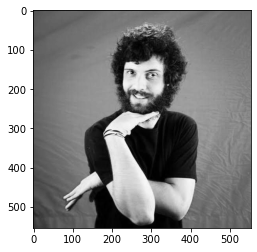

In [4]:
plt.imshow(img, cmap='gray')
plt.imsave('grey_scale.png', img, cmap='gray')

In [5]:
def apply_transform(img, kernel):
    new_img = []
    padding = (np.shape(kernel)[0]//2)
    for yi in range (padding, (np.shape(img)[0]-padding)):
        for xi in range (padding, (np.shape(img)[1]-padding)):
            y_ini = yi-padding
            x_ini = xi-padding
            y_fin = yi+padding+1
            x_fin = xi+padding+1

            new_value = np.sum(np.matmul(img[y_ini:y_fin, x_ini:x_fin], kernel))
            new_img.append(new_value)
    
    size_img = int(np.sqrt(np.shape(new_img)[0]))
    new_img = np.reshape(new_img, (size_img, size_img))
    
    return new_img

In [6]:
def gaussian_filter(img, kernel_size=3, sigma=2):
    
        kernel = np.fromfunction(lambda x, y: (1/(2*math.pi*sigma**2)) * 
                 math.e ** ((-1*((x-(kernel_size-1)/2)**2+(y-(kernel_size-1)/2)**2))/(2*sigma**2)), (kernel_size, kernel_size))
        
        kernel = kernel / np.sum(kernel)
        
        gaussian_total = apply_transform(img, kernel)
        
        plt.imshow(gaussian_total, cmap='gray')
        plt.imsave('result_gaussian.png', gaussian_total, cmap='gray')
        
        return gaussian_total

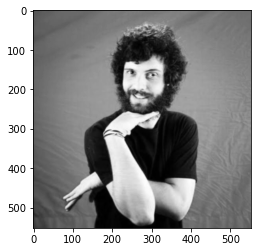

In [7]:
gaussian_img = gaussian_filter(img)

In [8]:
def apply_threshold(matrix, threshold):
    for yi in range(np.shape(matrix)[0]):
        for xi in range(np.shape(matrix)[1]):
            if (matrix[xi][yi] < threshold):
                matrix[xi][yi] = 0
            else:
                matrix[xi][yi] = 1

In [9]:
def sobel_filter(img, threshold=None):
    sobel_kernel_x = [[-1,0,1],[-2,0,2],[-1,0,1]]
    sobel_kernel_y = [[1,2,1],[0,0,0],[-1,-2,-1]]
    
    sobel_x = apply_transform(img, sobel_kernel_x)
    sobel_y = apply_transform(img, sobel_kernel_y)
    sobel_x = np.square(sobel_x)
    sobel_y = np.square(sobel_y)
    
    sobel_total = sobel_x + sobel_y
    sobel_total = np.sqrt(sobel_total)
    
    print("Max Value: {} \nMin Value: {} \nMean: {}".format(np.max(sobel_total), np.min(sobel_total), np.mean(sobel_total)))
    
    if (threshold==None):
        threshold = np.mean(sobel_total)
        
    print("Threshold: {}".format(threshold))
        
    apply_threshold(sobel_total, threshold)
    
    plt.imshow(sobel_total, cmap='gray')
    plt.imsave('result_sobel.png', sobel_total, cmap='gray')

Max Value: 8280.911958482357 
Min Value: 0.0 
Mean: 232.98354184320283
Threshold: 232.98354184320283


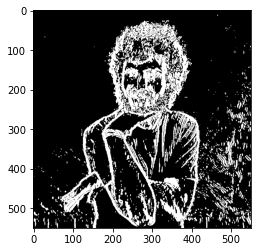

In [10]:
sobel_filter(gaussian_img)

In [11]:
def laplacian_filter(img, threshold=None):
    laplace_kernel = [[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]
    
    laplace_total = apply_transform(img, laplace_kernel)
    
    print("Max Value: {} \nMin Value: {} \nMean: {}".format(np.max(laplace_total), np.min(laplace_total), np.mean(laplace_total)))
    
    if (threshold==None):
        threshold = np.mean(laplace_total)
        
    print("Threshold: {}".format(threshold))
        
    apply_threshold(laplace_total, threshold)
    
    plt.imshow(laplace_total, cmap='gray')
    plt.imsave('result_laplacian.png', laplace_total, cmap='gray')

Max Value: 2645.001388521022 
Min Value: -2581.5205706809056 
Mean: 0.03914871888183559
Threshold: 0.03914871888183559


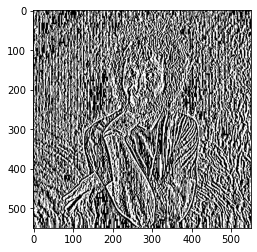

In [12]:
laplacian_filter(gaussian_img)